# Oakland Tree Maps

Set of tree maps that represent spending sums on an Oakland organizational and department level.

In [1]:
import pandas as pd
import squarify as sq
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def display_tree(df):
    sizes=df.values
    label=df.index
    sq.plot(sizes=sizes, label=label, value=df.values, alpha=0.6 )
    plt.show()

In [3]:
def dept_tree_df(df, dept):
    df = df.to_frame().reset_index().rename(columns= {0: 'Sum'})
    df['Parent'] = dept
    return df

In [4]:
oakland = pd.read_csv('../data/processed/oak_aggregation.csv')

In [5]:
oakland.head()

,Department Alias,FY18-19 Midcycle Adopted Total,FY19-20 Biennial Working Total,FY20-21 Biennial Working Total,Agencies by Category
0,Capital Improvement Projects,66201524.0,102439500.0,92860926.0,"Public Works, Transportation, and Commerce"
1,City Administrator,18912172.0,23722653.0,25178890.0,General Administration & Finance
2,City Attorney,18615221.0,20216139.0,21696825.0,General Administration & Finance
3,City Auditor,2064905.0,2309876.0,2426363.0,General Administration & Finance
4,City Clerk,7259799.0,7523024.0,7386812.0,General Administration & Finance


In [18]:
org_21 = oakland.groupby(['Agencies by Category']).sum()['FY20-21 Biennial Working Total']
org_21

Agencies by Category
Culture & Recreation                          1.279472e+08
General Administration & Finance              1.114219e+09
Human Welfare & Neighborhood Development      2.886949e+08
Public Protection                             5.492250e+08
Public Works, Transportation, and Commerce    1.224018e+09
Name: FY20-21 Biennial Working Total, dtype: float64

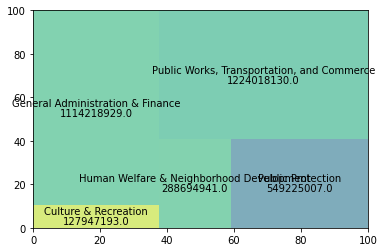

In [19]:
display_tree(org_21)

In [10]:
# Per Department
culture_rec_21 = oakland[oakland['Agencies by Category'] == 'Culture & Recreation'].groupby(['Department Alias']).sum()['FY20-21 Biennial Working Total']
gen_admin_21 = oakland[oakland['Agencies by Category'] == 'General Administration & Finance'].groupby(['Department Alias']).sum()['FY20-21 Biennial Working Total']
hum_welfare_21 = oakland[oakland['Agencies by Category'] == 'Human Welfare & Neighborhood Development'].groupby(['Department Alias']).sum()['FY20-21 Biennial Working Total']
pub_protection_21 = oakland[oakland['Agencies by Category'] == 'Public Protection'].groupby(['Department Alias']).sum()['FY20-21 Biennial Working Total']
pub_works_21 = oakland[oakland['Agencies by Category'] == 'Public Works, Transportation, and Commerce'].groupby(['Department Alias']).sum()['FY20-21 Biennial Working Total']

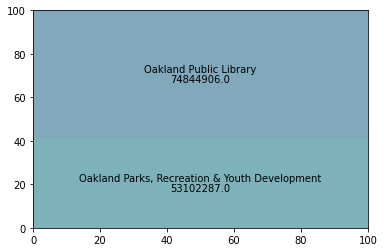

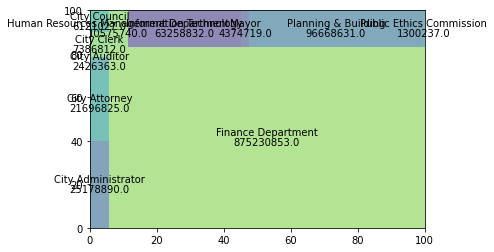

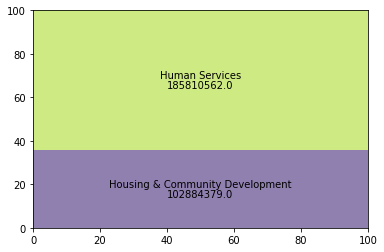

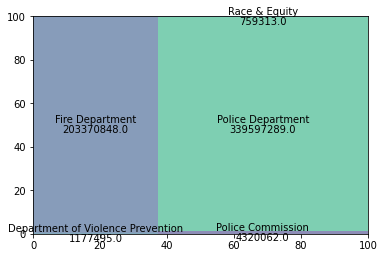

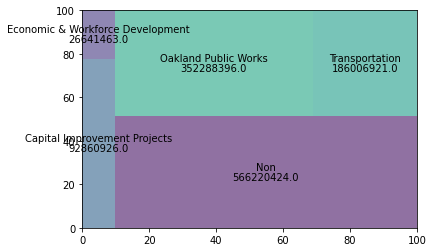

In [13]:
display_tree(culture_rec_21)
display_tree(gen_admin_21)
display_tree(hum_welfare_21)
display_tree(pub_protection_21)
display_tree(pub_works_21)

In [86]:
org_sums = oakland.groupby(['Agencies by Category']).sum().sum(axis=1)
org_sums

Agencies by Category
Culture & Recreation                          3.571042e+08
General Administration & Finance              3.172296e+09
Human Welfare & Neighborhood Development      8.645422e+08
Public Protection                             1.555691e+09
Public Works, Transportation, and Commerce    3.635214e+09
dtype: float64

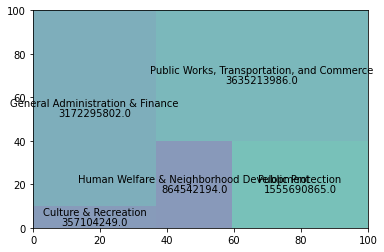

In [63]:
display_tree(org_sums)

In [15]:
# Per Department
culture_rec = oakland[oakland['Agencies by Category'] == 'Culture & Recreation'].groupby(['Department Alias']).sum().sum(axis=1)
gen_admin = oakland[oakland['Agencies by Category'] == 'General Administration & Finance'].groupby(['Department Alias']).sum().sum(axis=1)
hum_welfare = oakland[oakland['Agencies by Category'] == 'Human Welfare & Neighborhood Development'].groupby(['Department Alias']).sum().sum(axis=1)
pub_protection = oakland[oakland['Agencies by Category'] == 'Public Protection'].groupby(['Department Alias']).sum().sum(axis=1)
pub_works = oakland[oakland['Agencies by Category'] == 'Public Works, Transportation, and Commerce'].groupby(['Department Alias']).sum().sum(axis=1)

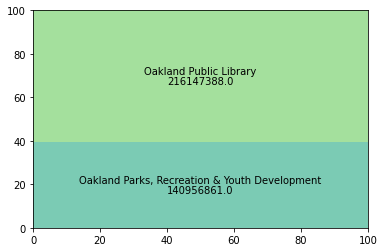

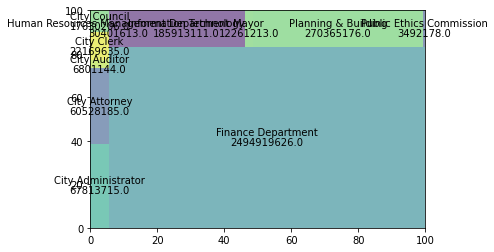

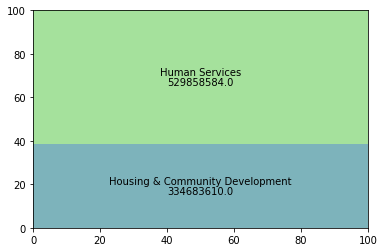

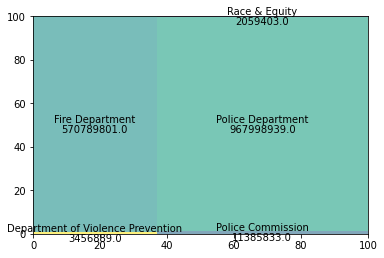

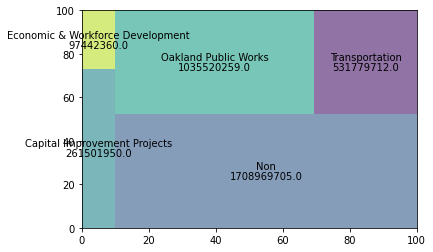

In [16]:
display_tree(culture_rec)
display_tree(gen_admin)
display_tree(hum_welfare)
display_tree(pub_protection)
display_tree(pub_works)

In [22]:
tree_df_21 = org_21.to_frame().reset_index().rename(columns= {0: 'Sum'})
tree_df_21 = tree_df_21.rename(columns={'Agencies by Category': 'Department Alias'})
tree_df_21['Parent'] = 'Total Budget'
tree_df_21

,Department Alias,FY20-21 Biennial Working Total,Parent
0,Culture & Recreation,1.279472e+08,Total Budget
1,General Administration & Finance,1.114219e+09,Total Budget
2,Human Welfare & Neighborhood Development,2.886949e+08,Total Budget
3,Public Protection,5.492250e+08,Total Budget
4,"Public Works, Transportation, and Commerce",1.224018e+09,Total Budget


In [23]:
tree_df_21 = pd.concat([tree_df_21, dept_tree_df(culture_rec_21, 'Culture & Recreation'),
dept_tree_df(gen_admin_21, 'General Administration & Finance'),
dept_tree_df(hum_welfare_21, 'Human Welfare & Neighborhood Development'),
dept_tree_df(pub_protection_21, 'Public Protection'),
dept_tree_df(pub_works_21, 'Public Works, Transportation, and Commerce')])

In [24]:
tree_df_21

,Department Alias,FY20-21 Biennial Working Total,Parent
0,Culture & Recreation,1.279472e+08,Total Budget
1,General Administration & Finance,1.114219e+09,Total Budget
2,Human Welfare & Neighborhood Development,2.886949e+08,Total Budget
3,Public Protection,5.492250e+08,Total Budget
4,"Public Works, Transportation, and Commerce",1.224018e+09,Total Budget
0,"Oakland Parks, Recreation & Youth Development",5.310229e+07,Culture & Recreation
1,Oakland Public Library,7.484491e+07,Culture & Recreation
0,City Administrator,2.517889e+07,General Administration & Finance
1,City Attorney,2.169682e+07,General Administration & Finance
2,City Auditor,2.426363e+06,General Administration & Finance


In [25]:
tree_df_21.to_json(orient='records')

'[{"Department Alias":"Culture & Recreation","FY20-21 Biennial Working Total":127947193.0,"Parent":"Total Budget"},{"Department Alias":"General Administration & Finance","FY20-21 Biennial Working Total":1114218929.0,"Parent":"Total Budget"},{"Department Alias":"Human Welfare & Neighborhood Development","FY20-21 Biennial Working Total":288694941.0,"Parent":"Total Budget"},{"Department Alias":"Public Protection","FY20-21 Biennial Working Total":549225007.0,"Parent":"Total Budget"},{"Department Alias":"Public Works, Transportation, and Commerce","FY20-21 Biennial Working Total":1224018130.0,"Parent":"Total Budget"},{"Department Alias":"Oakland Parks, Recreation & Youth Development","FY20-21 Biennial Working Total":53102287.0,"Parent":"Culture & Recreation"},{"Department Alias":"Oakland Public Library","FY20-21 Biennial Working Total":74844906.0,"Parent":"Culture & Recreation"},{"Department Alias":"City Administrator","FY20-21 Biennial Working Total":25178890.0,"Parent":"General Administra

In [26]:
# Write to plot_data directory
tree_df_21.to_json('plot_data/oakland_tree_map_21.json', orient='records')

In [109]:
tree_df = org_sums.to_frame().reset_index().rename(columns= {0: 'Sum'})
tree_df = df.rename(columns={'Agencies by Category': 'Department Alias'})
tree_df['Parent'] = 'Total Budget'
tree_df

,Department Alias,Sum,Parent
0,Culture & Recreation,3.571042e+08,Total Budget
1,General Administration & Finance,3.172296e+09,Total Budget
2,Human Welfare & Neighborhood Development,8.645422e+08,Total Budget
3,Public Protection,1.555691e+09,Total Budget
4,"Public Works, Transportation, and Commerce",3.635214e+09,Total Budget


In [113]:
tree_df = pd.concat([tree_df, dept_tree_df(culture_rec, 'Culture & Recreation'),
dept_tree_df(gen_admin, 'General Administration & Finance'),
dept_tree_df(hum_welfare, 'Human Welfare & Neighborhood Development'),
dept_tree_df(pub_protection, 'Public Protection'),
dept_tree_df(pub_works, 'Public Works, Transportation, and Commerce')])

In [121]:
tree_df

,Department Alias,Sum,Parent
0,Culture & Recreation,3.571042e+08,Total Budget
1,General Administration & Finance,3.172296e+09,Total Budget
2,Human Welfare & Neighborhood Development,8.645422e+08,Total Budget
3,Public Protection,1.555691e+09,Total Budget
4,"Public Works, Transportation, and Commerce",3.635214e+09,Total Budget
0,"Oakland Parks, Recreation & Youth Development",1.409569e+08,Culture & Recreation
1,Oakland Public Library,2.161474e+08,Culture & Recreation
0,City Administrator,6.781372e+07,General Administration & Finance
1,City Attorney,6.052818e+07,General Administration & Finance
2,City Auditor,6.801144e+06,General Administration & Finance


In [122]:
tree_df.to_json(orient='records')

'[{"Department Alias":"Culture & Recreation","Sum":357104249.0,"Parent":"Total Budget"},{"Department Alias":"General Administration & Finance","Sum":3172295802.0,"Parent":"Total Budget"},{"Department Alias":"Human Welfare & Neighborhood Development","Sum":864542194.0,"Parent":"Total Budget"},{"Department Alias":"Public Protection","Sum":1555690865.0,"Parent":"Total Budget"},{"Department Alias":"Public Works, Transportation, and Commerce","Sum":3635213986.0,"Parent":"Total Budget"},{"Department Alias":"Oakland Parks, Recreation & Youth Development","Sum":140956861.0,"Parent":"Culture & Recreation"},{"Department Alias":"Oakland Public Library","Sum":216147388.0,"Parent":"Culture & Recreation"},{"Department Alias":"City Administrator","Sum":67813715.0,"Parent":"General Administration & Finance"},{"Department Alias":"City Attorney","Sum":60528185.0,"Parent":"General Administration & Finance"},{"Department Alias":"City Auditor","Sum":6801144.0,"Parent":"General Administration & Finance"},{"

In [120]:
# Write to plot_data directory
tree_df.to_json('plot_data/oakland_tree_map.json', orient='records')